In [ ]:
#========================LINEAR REGRESSION===================================

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing the dataset and extracting the independent and dependent variables
projectreg = pd.read_csv("AttritionCaseStudy.csv")

X = projectreg.drop('MonthlyIncome', axis=1)
y = projectreg['MonthlyIncome']

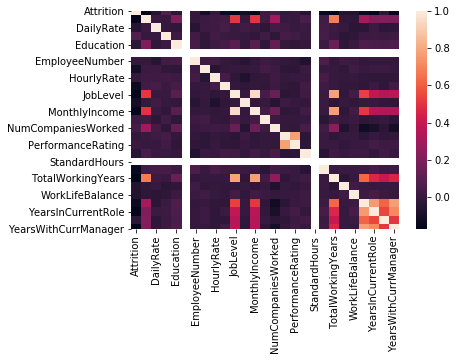

In [4]:
#Data Visualisation
#Building the Correlation matrix
sns.heatmap(projectreg.corr())

In [7]:
#Encoding Categorical data
dummyCols = pd.get_dummies(projectreg['Department'])
dummyCols1 = pd.get_dummies(projectreg['Education'])
dummyCols2 = pd.get_dummies(projectreg['BusinessTravel'])
dummyCols3 = pd.get_dummies(projectreg['EducationField'])
dummyCols4 = pd.get_dummies(projectreg['Gender'])
dummyCols5 = pd.get_dummies(projectreg['JobRole'])
dummyCols6 = pd.get_dummies(projectreg['MaritalStatus'])
dummyCols7 = pd.get_dummies(projectreg['Over18'])
X = pd.concat([X,dummyCols,dummyCols1,dummyCols2,dummyCols3,dummyCols4,dummyCols5,dummyCols6,dummyCols7],
              sort = False, axis = 1)

In [12]:
X.drop(['BusinessTravel','Department','Education','EducationField','Gender','JobRole','MaritalStatus','Over18'],
       axis = 1,inplace = True)

In [21]:
dummyCols8 = pd.get_dummies(projectreg['OverTime'])
X = pd.concat([X,dummyCols8],sort = False, axis = 1)

In [22]:
X.drop(['OverTime'],axis = 1,inplace = True)

In [20]:
X

,Attrition,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single,Y
0,1,41,1102,1,1,1,2,94,3,2,...,0,0,0,0,1,0,0,0,1,1
1,0,49,279,8,1,2,3,61,2,2,...,0,0,0,1,0,0,0,1,0,1
2,1,37,1373,2,1,4,4,92,2,1,...,0,0,0,0,0,0,0,0,1,1
3,0,33,1392,3,1,5,4,56,3,1,...,0,0,0,1,0,0,0,1,0,1
4,0,27,591,2,1,7,1,40,3,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,884,23,1,2061,3,41,4,2,...,0,0,0,0,0,0,0,1,0,1
1466,0,39,613,6,1,2062,4,42,2,3,...,0,0,0,0,0,0,0,1,0,1
1467,0,27,155,4,1,2064,2,87,4,2,...,0,1,0,0,0,0,0,1,0,1
1468,0,49,1023,2,1,2065,4,63,2,2,...,0,0,0,0,1,0,0,1,0,1


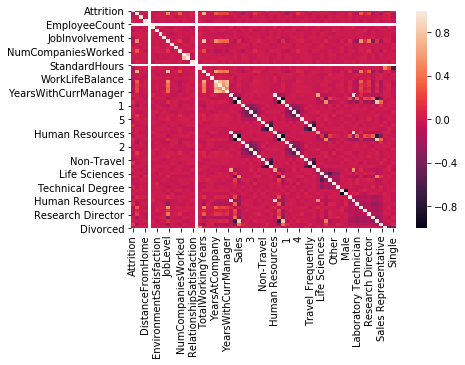

In [14]:
sns.heatmap(X.corr())

In [23]:
#Splitting the data into the training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
#Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#Predicting the Test set Results
y_pred = regressor.predict(X_test)
print(y_pred)

[ 9276.25585938  5404.86523438  6121.33203125  9693.92578125
  2737.76757812  2126.6328125   6874.38671875  6103.5625
  5507.19726562  2849.23632812 11633.78515625  1893.0546875
  6872.45703125  3303.32421875  9121.61132812  2829.97265625
  6554.45117188  6293.94140625  8282.3515625   2185.47070312
  2099.40039062 19386.609375    5699.25390625  6079.4765625
  6396.00195312  6037.90820312  1786.87109375  9130.83789062
  2048.96289062  5955.17578125  6412.54492188  6120.08984375
  9555.31054688  9135.59765625  5587.53710938 13594.578125
 12569.47070312  2064.46289062  8715.45507812  2688.6875
  5553.859375    8592.09765625 13907.32226562  9031.05859375
  1980.02148438  2979.875       2526.81835938  5969.24023438
  3219.58007812  3273.21484375 17074.50585938  1958.49804688
  8786.7890625   5635.65234375  2796.85742188  5358.72265625
  6011.24609375  6396.07617188  2849.79882812  6461.66015625
  3233.28320312  6252.765625    6202.81445312  5319.55859375
 13429.82617188 13652.3828125   3149

ValueError: x and y must be the same size

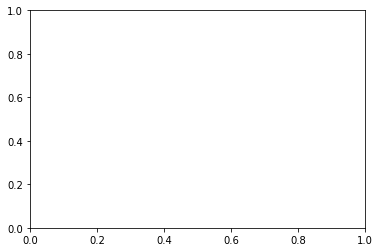

In [38]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
#plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('(Training set)')
plt.xlabel('All values of X')
plt.ylabel('MonthlyIncome')
plt.show()

In [31]:
#Calculating the Intercept and coefficients
#Taking values in the eq y=m1*x1+m2*x2+m3*m3+................+mn*xn+c
#m - slopes and c - coef

print("The value of intercept(c) : {}" .format(regressor.intercept_))
print("The value of coefficients(Bn)  {}:" .format(regressor.coef_))

The value of intercept(c) : 13630855253317.338
The value of coefficients(Bn)  [ 5.25367384e+00 -9.16146969e+00  9.49658212e-02 -5.07399906e+00
 -1.36175742e+13  1.26442278e-01 -2.05050606e+02  1.89767494e+00
 -1.34564472e+02  2.70887378e+03  1.88815063e+02 -9.76562500e-03
  1.20368652e+01  3.00293579e+01 -3.01925488e+02  3.11741638e+01
 -2.00449561e+08  5.22531738e+01  3.54326172e+01 -1.25340576e+01
  3.61497803e+01  4.07324219e+00  1.89501953e+00  3.63964844e+01
 -2.80500488e+01  4.67647610e+08  3.85889180e+08  1.24057325e+09
  5.31385267e+06  4.30350669e+08  2.38932441e+08  4.59416951e+08
  3.88251303e+08  8.86412269e+08  7.99908818e+08  9.79657430e+08
  5.01599992e+08  5.83358327e+08 -2.71325222e+08  7.86491977e+08
  3.61454916e+08  5.52873309e+08  3.32388858e+08  4.03554250e+08
  9.30884817e+08  1.01738834e+09  8.37639566e+08 -9.50101797e+08
 -9.50101453e+08 -9.50101343e+08 -9.50101495e+08 -9.50101624e+08
 -9.50101345e+08 -3.41019208e+08 -3.41019106e+08  1.83646548e+08
  1.83646164

In [30]:
#Calculting the R squared value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9352115413791173

NameError: name 'RSS' is not defined